<a href="https://colab.research.google.com/github/IanTirok/Nairobi-Hospital-Hypothyroidism-Prediction/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2021_07_Ian_Tirok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the question

### a) Specifying the question

In this weeks project, we are working with Nairobi Hospital. After conducting a clinical camp to test for hypothyroidism, the hospital has collected data on Thyroid patients and hopes to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Metric of success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 95%.

### c) Understanding the experimental design

The experimental design for this project is as follows:


*   Loading the libraries and dataset
*   Data cleaning and preparation
*   Performing the Univariate analysis
*   Performing the Bivariate analysis
*   Performing the Multivariate analysis
*   Applying the Decision tree algorithms
*   Applying the Support Vector algorithms
*   Making predictions using the different models that I've created
*   Assesing the accuracy of the models created
*   Making conclusions and challenging the solution




### d) Appropriateness of the data

The dataset provided has provided the data on the age and sex of the patients. It also highlights both the patients that suffer from Hypothyroidism and Hyperthyroidism and if the patient is on thyroxine medication or not. The target data also has 2 classes. Therefore the dataset looks appropriate to train the model on whether a patient is suffering from hypothyroid or not.

## 2. Reading the Data

In [192]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [193]:
# Loading the df ranking Dataset
url = '/content/hypothyroid.csv' 

df = pd.read_csv(url)
dfcopy = pd.read_csv(url)


## 3. Checking the Data

In [194]:
df.shape

(3163, 26)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [196]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [197]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [198]:
df.sample()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2360,negative,36,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,110,y,0.93,y,118,n,?


In [199]:
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

## 4. Tidying the Dataset

In [200]:
# replacing the missing values in TSH, T3, TT4, T4U, FTI with zero. This is because the patients who have missing values
# did not take the test. Therefore we will make the assumption that their test result was zero.
df.fillna(0, inplace=True)

# Removing the question marks in each column
df.replace('?',np.nan,inplace=True)

# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
df[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = df[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

# Converting to categorical data
df[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] =df[[
  "status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

# remove the TBG columns since it contains almost entirely null values
df.drop(['TBG','TBG_measured'], axis=1, inplace=True)

# calculate the mean age of the column age 
age_mean = df['age'].mean()
print('mean of the age column is:  ',age_mean)

# adding the mean age to the empty cells
df['age'].fillna(age_mean, inplace=True)

# replacing the null values of the sex column with the mode sex
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

# confirming there are no missing values
df.isnull().sum()

mean of the age column is:   51.154214206845786


status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

There are still some missing values

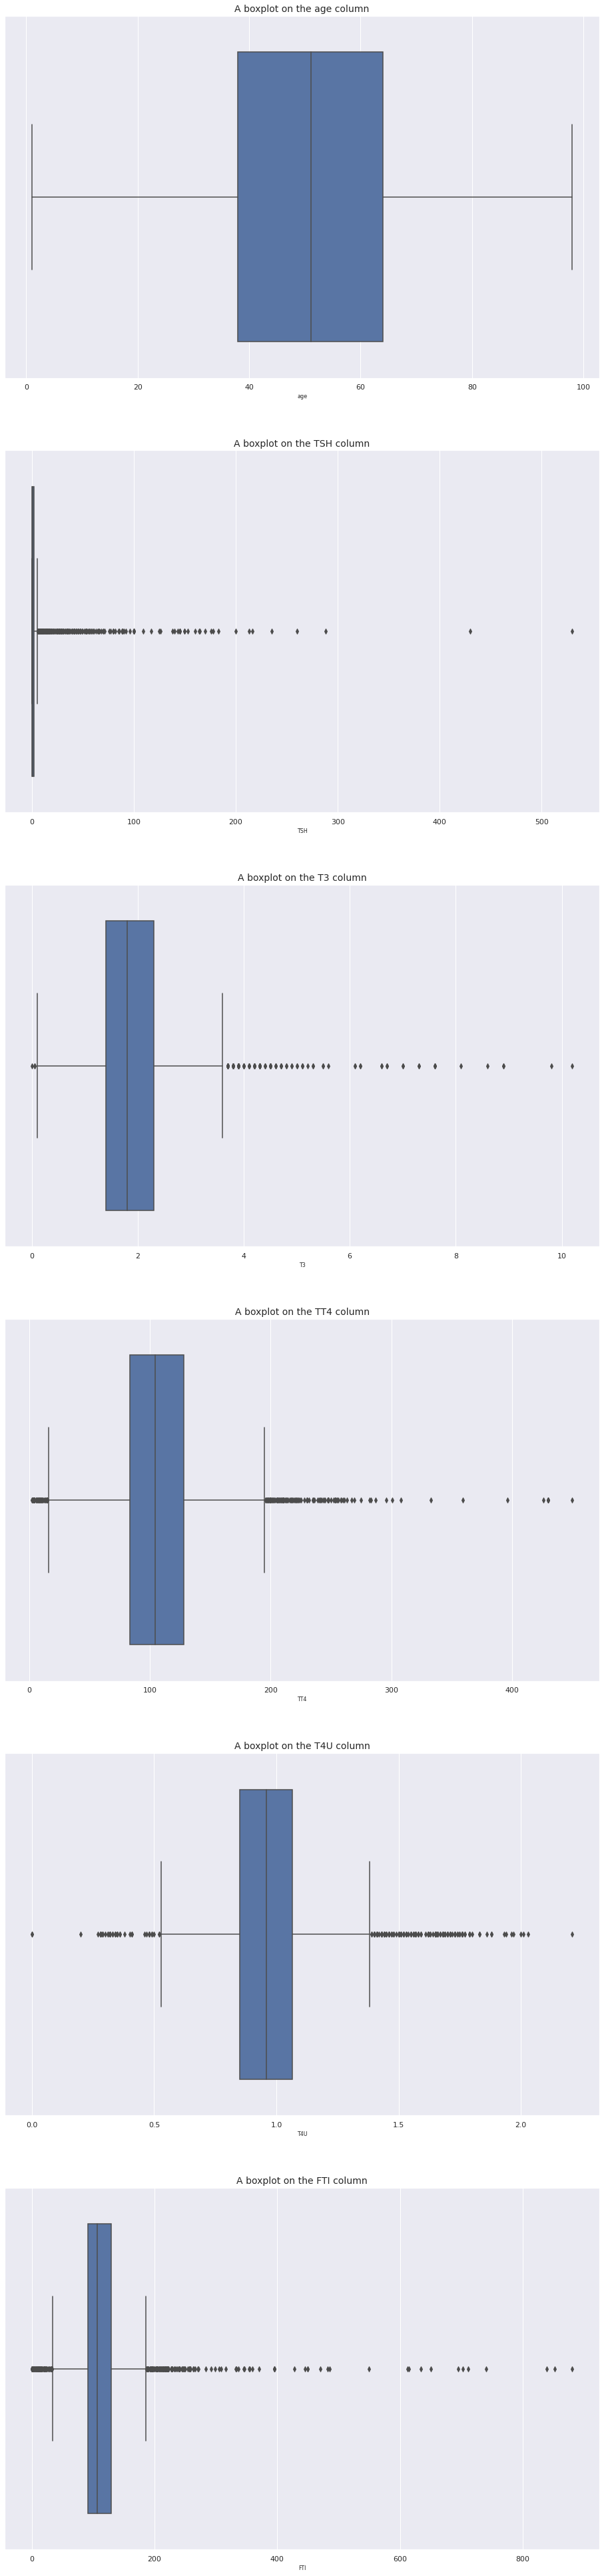

In [201]:
# Checking for Outliers


col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [202]:
#There seems to be very many outliers but lets count them to be sure

df1 = df[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


age      0
TSH    388
T3     122
TT4    183
T4U    203
FTI    245
dtype: int64

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [203]:
# Identifying the duplicate Data

len(df)-len(df.drop_duplicates())

156

In [204]:
# Dealing with the Duplicate Data
# They are very few entries that are duplicates I will procceed to drop them as now.
df = df.drop_duplicates()

In [205]:
# More data cleaning procedures

#Encoding columns
# encoding the true / false columns 

cat_cols = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
       'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']

# looping through the columns to encode
for col in cat_cols:

  cat_enc = {col:{'f':0,'t':1}}

  df.replace(cat_enc, inplace=True)

  df[col] = df[col].astype(int)

# encoding the yes / no categorical columns
cat_cols = ['TSH_measured','T3_measured','TT4_measured','T4U_measured',
       'FTI_measured']

# looping through the columns to encode
for col in cat_cols:

  cat_enc = {col:{'y':0,'n':1}}

  df.replace(cat_enc, inplace=True)

  df[col].astype(int)

# encoding the sex column
cat_enc = {'sex':{'M':0,'F':1}}

df.replace(cat_enc, inplace=True)

df['sex'].astype(int)

# checking to see if the changes have been effected
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.00,0,0,0,0,0,0,0,0,0,0,0,0,0,30.00,0,0.60,0,15.00,0,1.48,0,10.00
1,hypothyroid,15.00,1,1,0,0,0,0,0,0,0,0,0,0,0,145.00,0,1.70,0,19.00,0,1.13,0,17.00
2,hypothyroid,24.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0.20,0,4.00,0,1.00,0,0.00
3,hypothyroid,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0,430.00,0,0.40,0,6.00,0,1.04,0,6.00
4,hypothyroid,77.00,0,0,0,0,0,0,0,0,0,0,0,0,0,7.30,0,1.20,0,57.00,0,1.28,0,44.00


In [206]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [207]:
df.shape

(3007, 24)

## 5. Exploratory Analysis

###Measures of central tendancy


In [241]:
#getting summary
df.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,2339,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00,2339.00
unique,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,negative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,2211,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,53.14,0.69,0.12,0.01,0.01,0.04,0.07,0.06,0.02,0.04,0.01,0.00,0.02,0.00,5.87,0.00,1.92,0.00,106.99,0.00,0.98,0.00,113.80
std,NaN,17.63,0.46,0.32,0.10,0.11,0.18,0.26,0.25,0.15,0.19,0.11,0.03,0.15,0.00,24.42,0.00,0.95,0.00,43.75,0.00,0.23,0.00,58.48
min,NaN,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,NaN,41.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.00,82.00,0.00,0.85,0.00,91.00
50%,NaN,51.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,1.80,0.00,103.00,0.00,0.96,0.00,107.00
75%,NaN,67.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.20,0.00,2.30,0.00,125.00,0.00,1.06,0.00,126.00


In [242]:
# Mode
# Calculating mode across different columns

a = df[['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']].mode().head(1)

arr = a.to_numpy()
arr


array([['negative', 51.154214206845786, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0.0, 0, 1.8, 0, 98.0, 0, 0.99, 0, 98.0]], dtype=object)

In [243]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti'], 
       'The most appearing record': ['negative', 51.154214206845786, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6, 0.0, 98.0, 0.0,
        0.98, 0.0, 98.0]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,status,negative
1,age,51.15
2,sex,1.00
3,on_thyroxine,0.00
4,query_on_thyroxine,0.00
5,on_antithyroid_medication,0.00
6,thyroid_surgery,0.00
7,query_hypothyroid,0.00
8,query_hyperthyroid,0.00
9,pregnant,0.00


In [244]:
# Mean

# Calculating mean across different columns

a = df.mean()

a
a
b = pd.DataFrame(a)
b

,0
age,53.14
sex,0.69
on_thyroxine,0.12
query_on_thyroxine,0.01
on_antithyroid_medication,0.01
thyroid_surgery,0.04
query_hypothyroid,0.07
query_hyperthyroid,0.06
pregnant,0.02
sick,0.04


In [245]:
# Median
# Calculating the median for across different columns

a = df.median()

a
b = pd.DataFrame(a)
b

,0
age,51.15
sex,1.00
on_thyroxine,0.00
query_on_thyroxine,0.00
on_antithyroid_medication,0.00
thyroid_surgery,0.00
query_hypothyroid,0.00
query_hyperthyroid,0.00
pregnant,0.00
sick,0.00


### Measures of Dispersion

In [246]:
#Range for the respective columns
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

x = {}

for col in col:
    x[col] = df[col].max()- df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
       'The range is': [ 97.  , 530.  ,  10.2 , 448.  ,   2.21, 881.  ]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The range is
0,age,97.00
1,tsh,530.00
2,t3,10.20
3,tt4,448.00
4,t4u,2.21
5,fti,881.00


In [247]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}
for col in col:
    x[col] = df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
       'The standard deviation is': [17.86473057, 24.02319247,  0.97948777, 44.60670418,  0.22579596,
       60.14764859]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,age,17.86
1,tsh,24.02
2,t3,0.98
3,tt4,44.61
4,t4u,0.23
5,fti,60.15


In [248]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}
for col in col:
    x[col] = df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The variance is': [3.19148598e+02, 5.77113776e+02, 9.59396286e-01, 1.98975806e+03, 5.09838137e-02, 3.61773963e+03]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,age,319.15
1,tsh,577.11
2,t3,0.96
3,tt4,1989.76
4,t4u,0.05
5,fti,3617.74


In [249]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}

for col in col:
    x[col] = df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The kurtosis is': [-0.61063975, 153.66952518, 10.95369153, 6.84988693, 3.4314952 , 48.50293438]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,age,-0.61
1,tsh,153.67
2,t3,10.95
3,tt4,6.85
4,t4u,3.43
5,fti,48.50


In [250]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
for col in col:
    x[col] = df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The Skew is': [-0.19784403, 10.29193117,  2.16692249,  1.46782754,  0.9521684 , 5.21206511]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,age,-0.20
1,tsh,10.29
2,t3,2.17
3,tt4,1.47
4,t4u,0.95
5,fti,5.21


###Visualisation

###Univariate

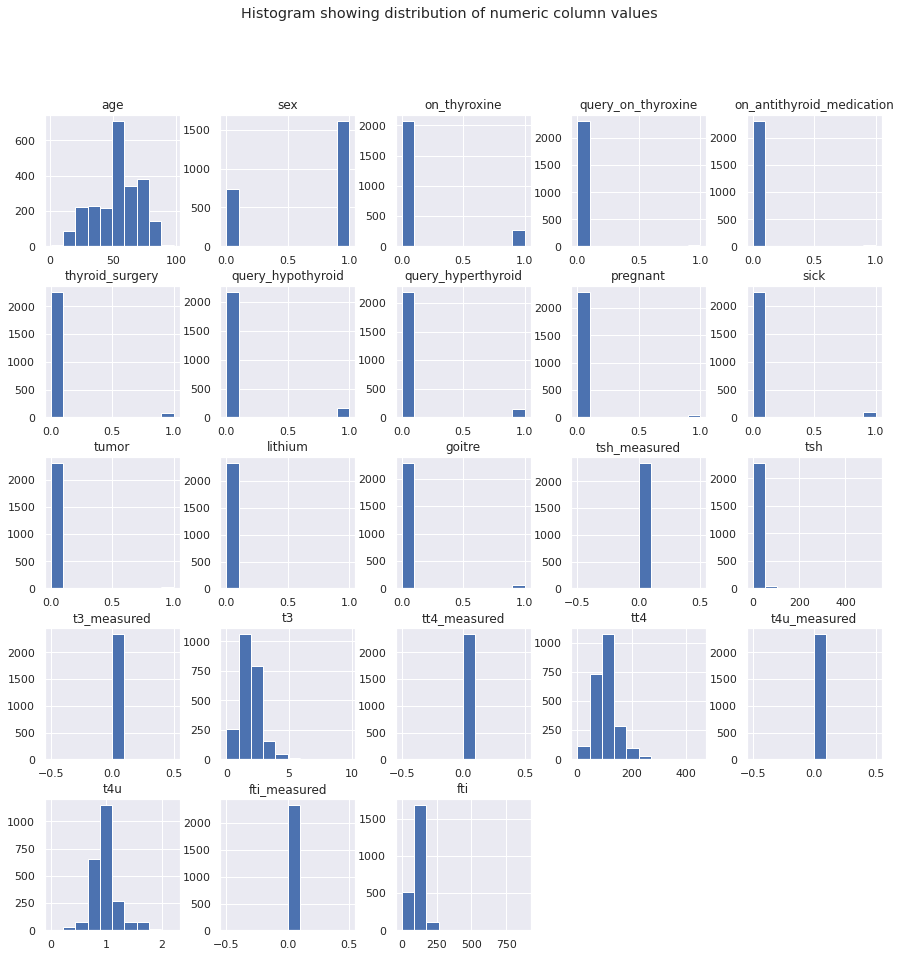

In [251]:

df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of numeric column values")
plt.savefig('Histogram')
plt.show()

In [252]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti'],
      dtype='object')

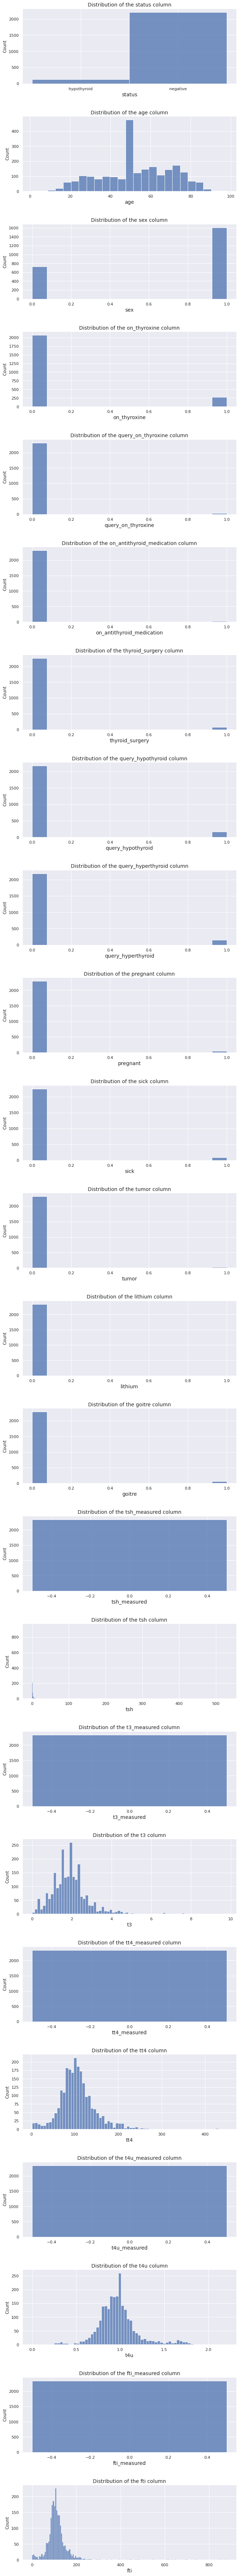

In [253]:

col_names = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']
fig, ax = plt.subplots(len(col_names), figsize = (10,100))
for i, col_val in enumerate(col_names):

    sns.histplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

###Bivariate

Lets find out whether there is an effect of the independent variables on status

Our independent variables are;
 

1. fti
2. age
3. sex 
4. query_on_thyroxine
5. on_antithyroid_medication
6. thyroid_surgery
7. query_hyperthyroid
8. pregnant
9. tsh_measured
10. tsh
11. t3_measured
12. t3
13. tt4_measured
14. tt4
15. t4u_measured
16. t4u
17. fti_measured
18. sick
19.  tumor
20.  lithium
21.  goitre
22. query_hypothyroid
23. on_thyroxine


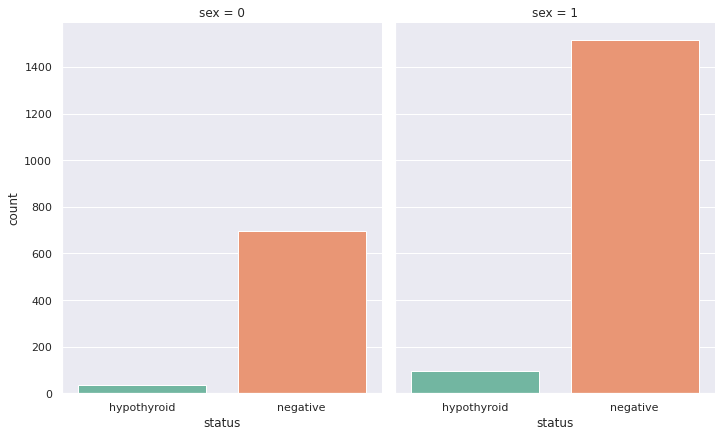

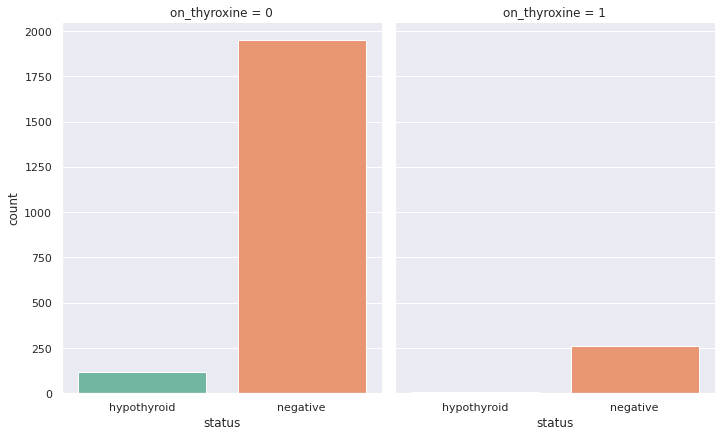

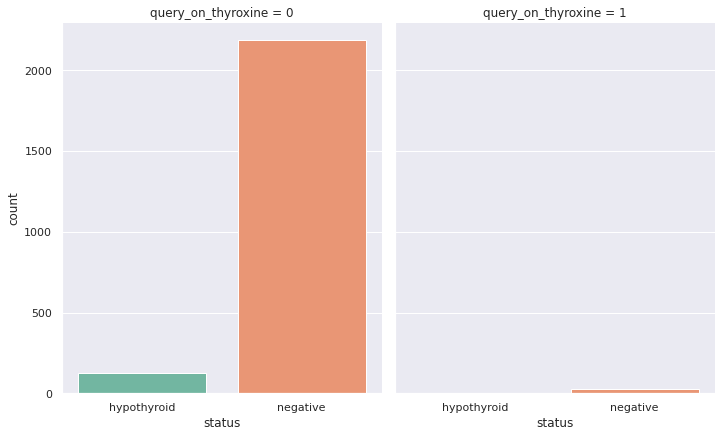

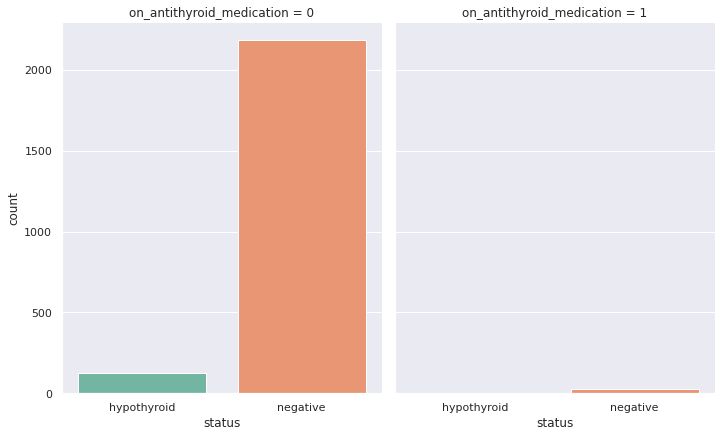

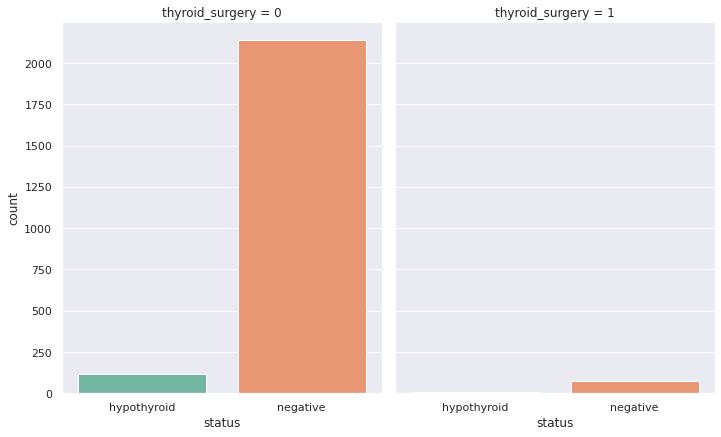

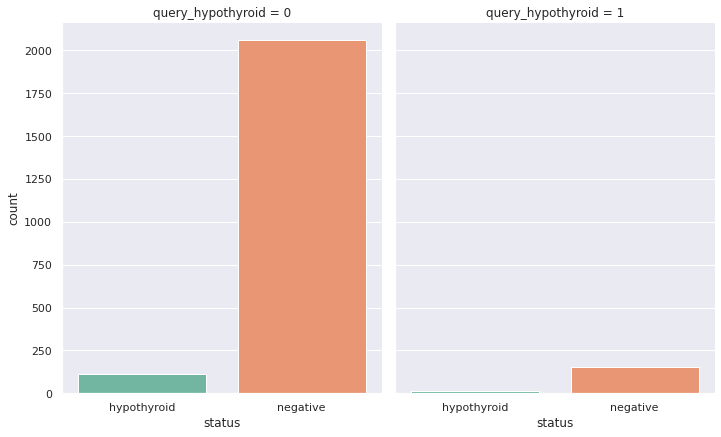

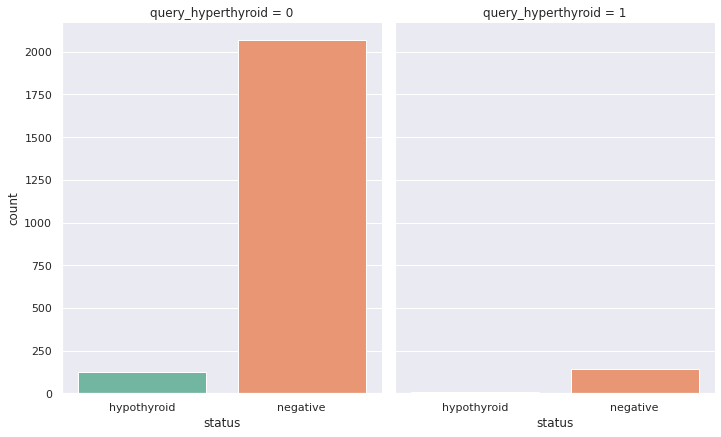

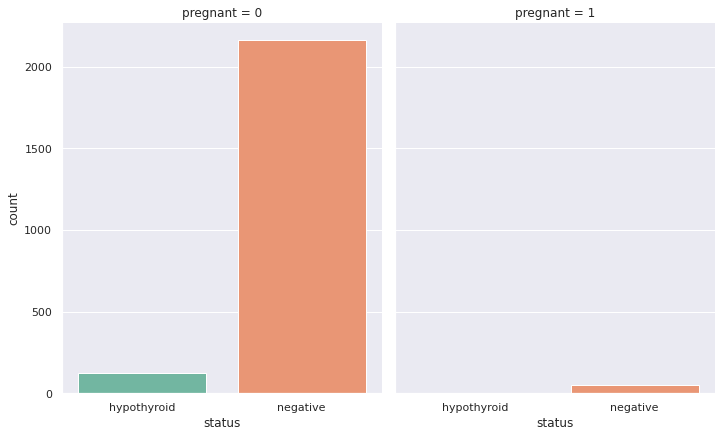

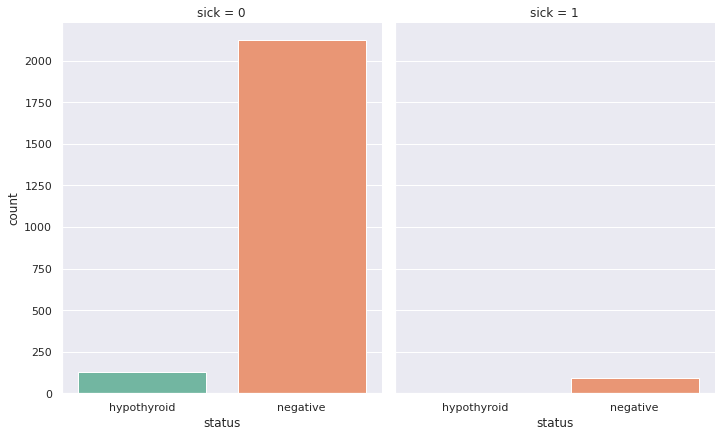

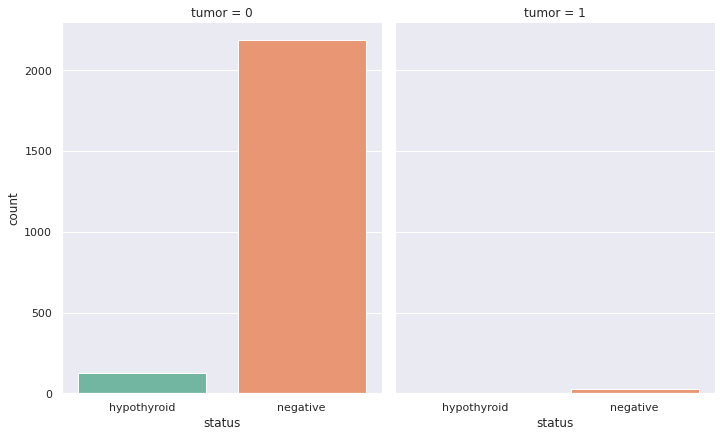

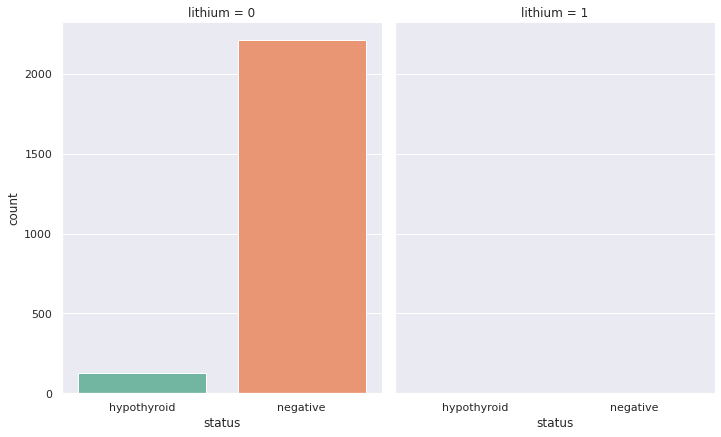

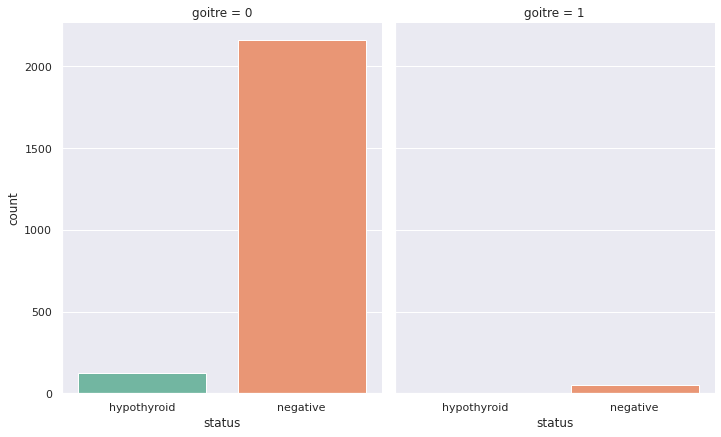

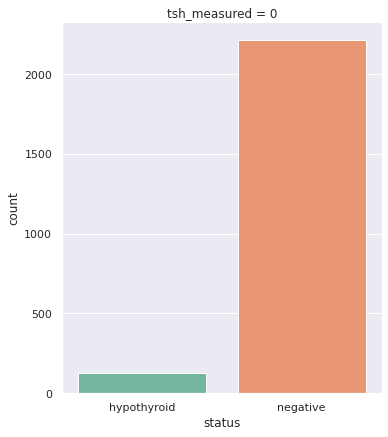

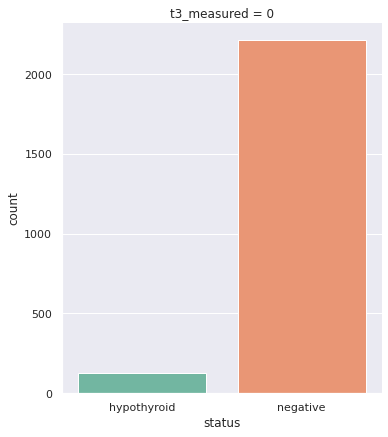

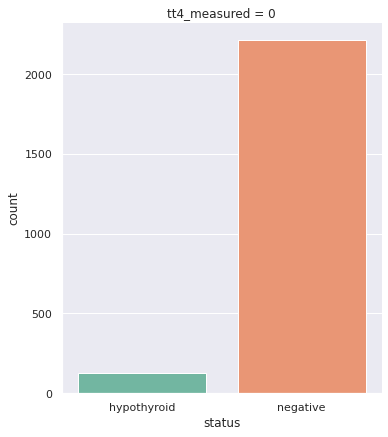

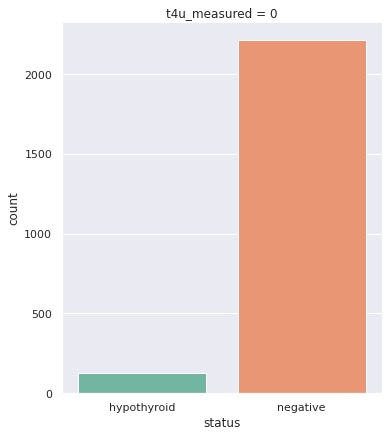

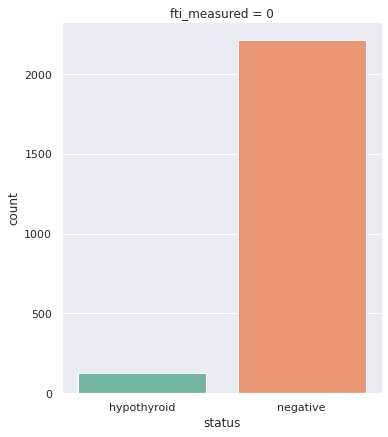

In [254]:
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="on_thyroxine", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="query_on_thyroxine", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="on_antithyroid_medication", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="thyroid_surgery", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="query_hypothyroid", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="query_hyperthyroid", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="pregnant", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="sick", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="tumor", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="lithium", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="goitre", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="tsh_measured", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="t3_measured", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="tt4_measured", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="t4u_measured", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="fti_measured", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set2')

plt.show()

Through the above plots, we can conclude the worst combination on likelyhood of having hypothyroid diseas are
1. Being female
2. Not being on thyroxine medication
3. Not being on antithyroid medication
4. Not having undergone antithyroid surgery
5. Not having hypothyroids
6. Not having hyperthyroids
7. Not being pregnant
8. Not showing symptoms of sickness
9. Not having a tumor
10. Not having lithium
11. Not having goitre
12. Having tsh_measured
13. Having t3 Measured
14. Having tt4 Measured
15. Having t4u measured
16. Having ft1 measured


In [255]:
df.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
tsh_measured                   1
tsh                          225
t3_measured                    1
t3                            65
tt4_measured                   1
tt4                          253
t4u_measured                   1
t4u                          156
fti_measured                   1
fti                          260
dtype: int64

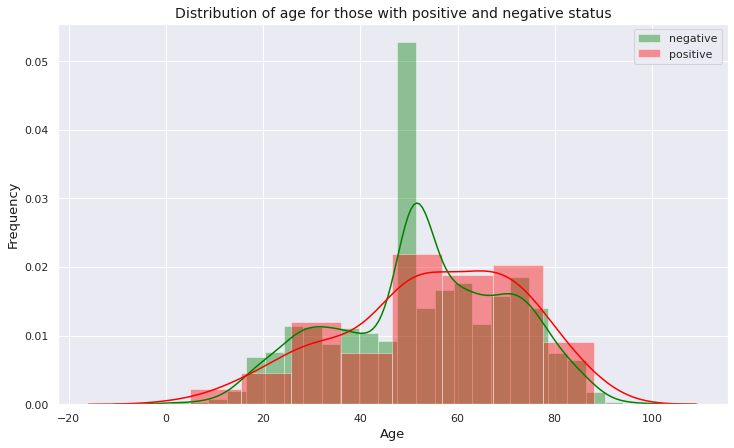

In [256]:

# Plotting histogram to show distribution of age per gender
# 
negative = df.loc[df.status=='negative', 'age']    # Selecting only negative datapoints in the age column
positive = df.loc[df.status=='hypothyroid', 'age']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of age for those with positive and negative status', fontsize = 14, color = 'k')
plt.xlabel('Age', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

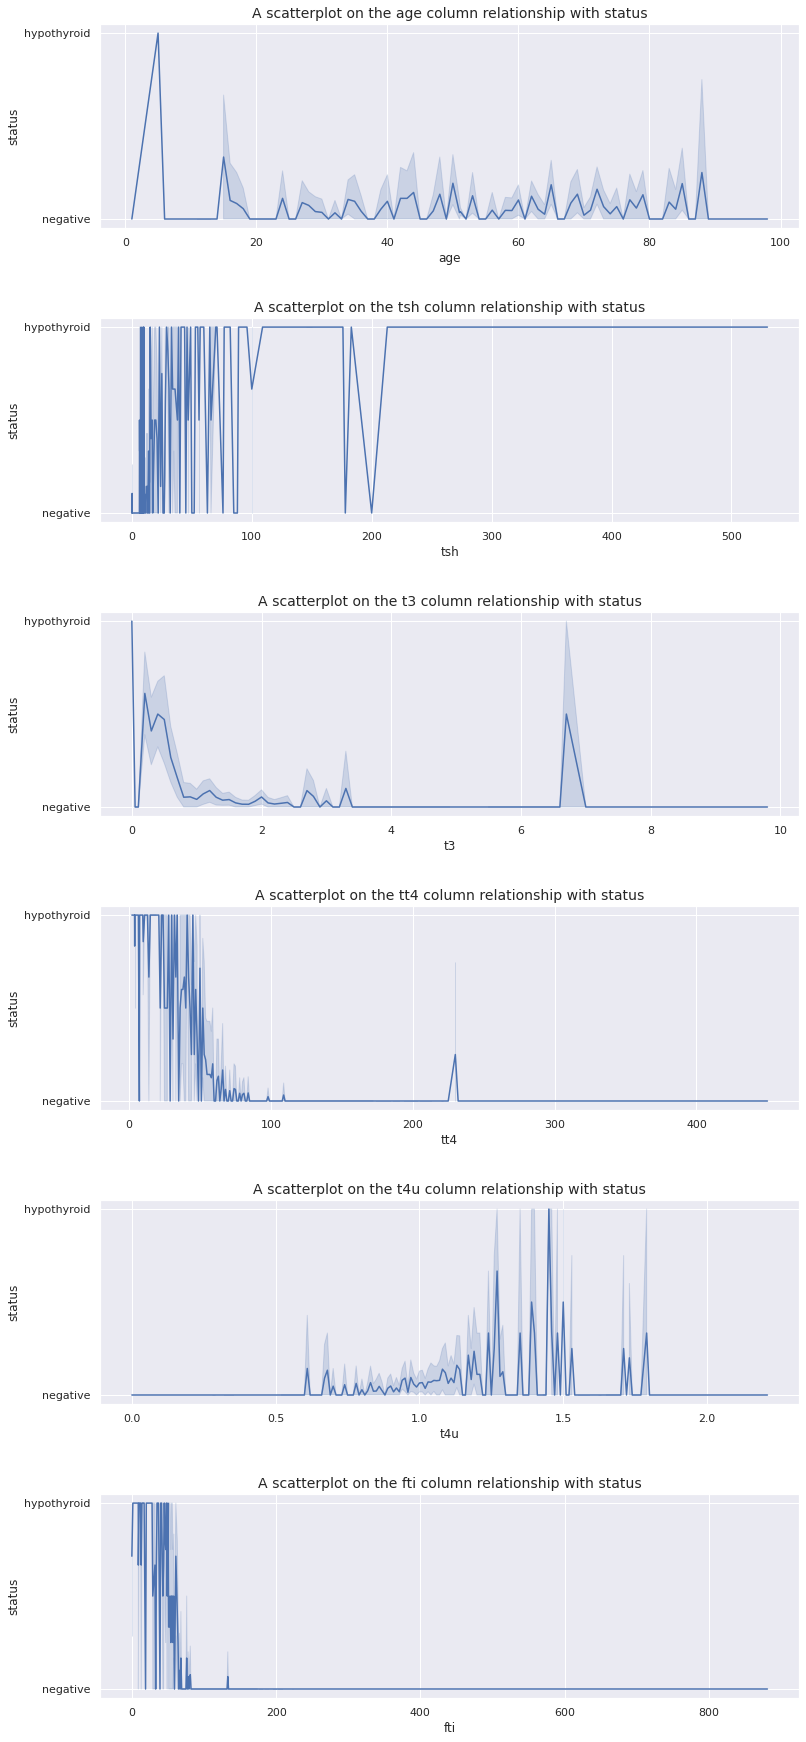

In [257]:

col_names = ["age", "tsh", "t3", "tt4", "t4u", "fti"]

fig, ax = plt.subplots(len(col_names), figsize = (12,25))
for i, col_val in enumerate(col_names):

    sns.lineplot(x = df[col_val], y=df['status'], ax=ax[i])
    ax[i].set_title('A scatterplot on the {} column relationship with status'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

In [258]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
# sns.pairplot(df)
# plt.show()


We can see that several columns have linear correlation

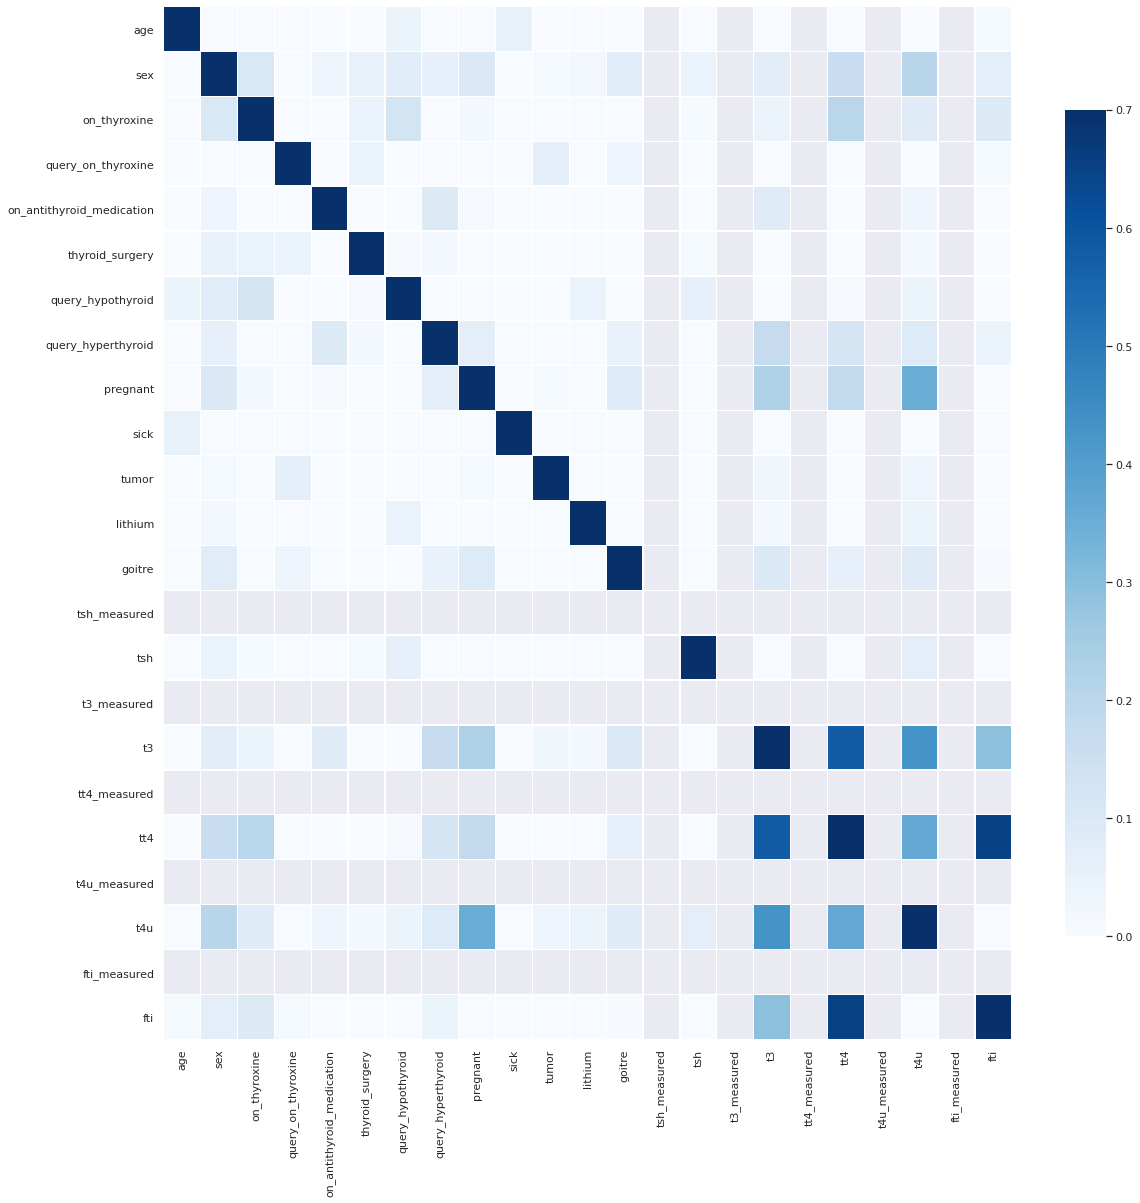

In [259]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(19,19)})

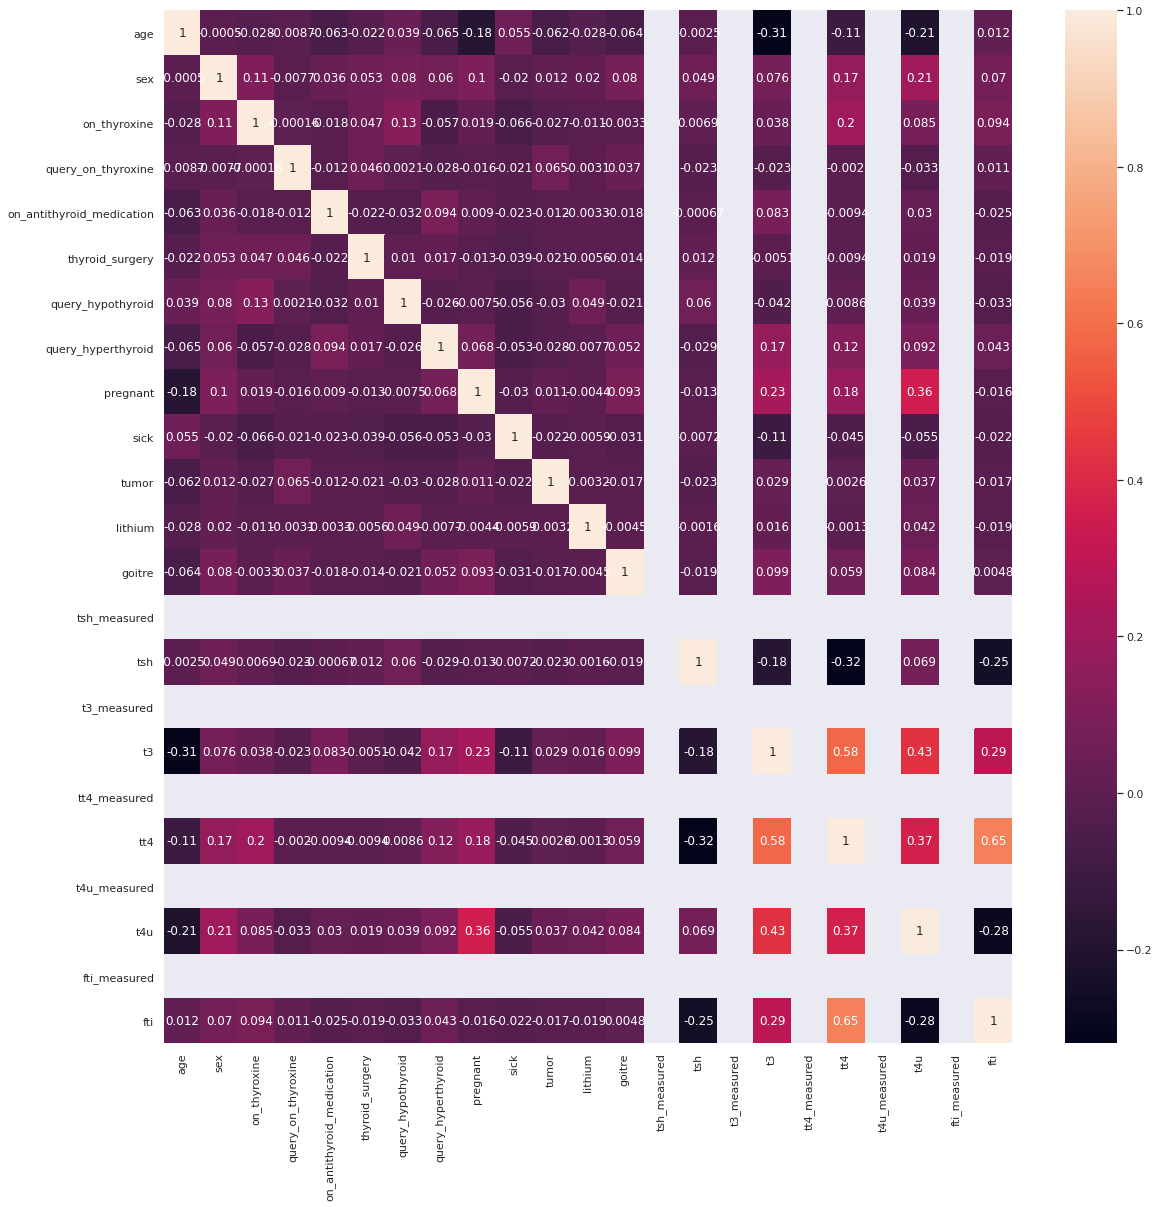

In [260]:
# heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

##6. Decision trees

In [208]:
df = df.dropna()

###Baseline Model

In [209]:
# split the data into labels and features

X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.017094017094017096
Mean Squared Error: 0.017094017094017096
Root Mean Squared Error: 0.1307440900921227
The accuracy of the model is  0.9829059829059829


###Random Forests

In [210]:
# split the data into labels and features

X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Creating a dictionary of parameters to tune
#
parameters = {'n_estimators': np.arange(16),
         'max_depth': np.arange(10)}

# Setting the number of folds to 5 and instantiating the model
# 

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other
print('how do the different depths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
from sklearn.ensemble import RandomForestRegressor
dtree_model = RandomForestRegressor(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
#Random Forests model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('The accuracy of the random forest model is ',metrics.accuracy_score(y_test, y_pred,normalize=True))

{'max_depth': 6, 'n_estimators': 10}


how do the different depths compare to each other

parameters {'max_depth': 0, 'n_estimators': 0}
mean Test scores: nan
Rank: 160
parameters {'max_depth': 0, 'n_estimators': 1}
mean Test scores: nan
Rank: 137
parameters {'max_depth': 0, 'n_estimators': 2}
mean Test scores: nan
Rank: 145
parameters {'max_depth': 0, 'n_estimators': 3}
mean Test scores: nan
Rank: 146
parameters {'max_depth': 0, 'n_estimators': 4}
mean Test scores: nan
Rank: 143
parameters {'max_depth': 0, 'n_estimators': 5}
mean Test scores: nan
Rank: 141
parameters {'max_depth': 0, 'n_estimators': 6}
mean Test scores: nan
Rank: 139
parameters {'max_depth': 0, 'n_estimators': 7}
mean Test scores: nan
Rank: 148
parameters {'max_depth': 0, 'n_estimators': 8}
mean Test scores: nan
Rank: 149
parameters {'max_depth': 0, 'n_estimators': 9}
mean Test scores: nan
Rank: 150


Training score: 0.9310275073976428
Test score: 0.661941309255079
Mean Absolute Error: 0.01855404883545118
Mean Squared

In [211]:
# split the data into labels and features

X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)


# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=5, random_state=0)

forest=forest.fit(X_train, y_train)

# predicting using the model
y_pred = forest.predict(X_test)

# comparing the actual and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the random forest model is ',metrics.accuracy_score(y_test, y_pred))


Mean Absolute Error: 0.017094017094017096
Mean Squared Error: 0.017094017094017096
Root Mean Squared Error: 0.1307440900921227
The accuracy of the random forest model is  0.9829059829059829


In [212]:
# # Performance of individual decision trees
# dot_data = StringIO()
# # pick a specific tree from the forest
# tree = forest.estimators_[50]

# export_graphviz(tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = X.columns)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('absenteism_forest.png')
# Image(graph.create_png())

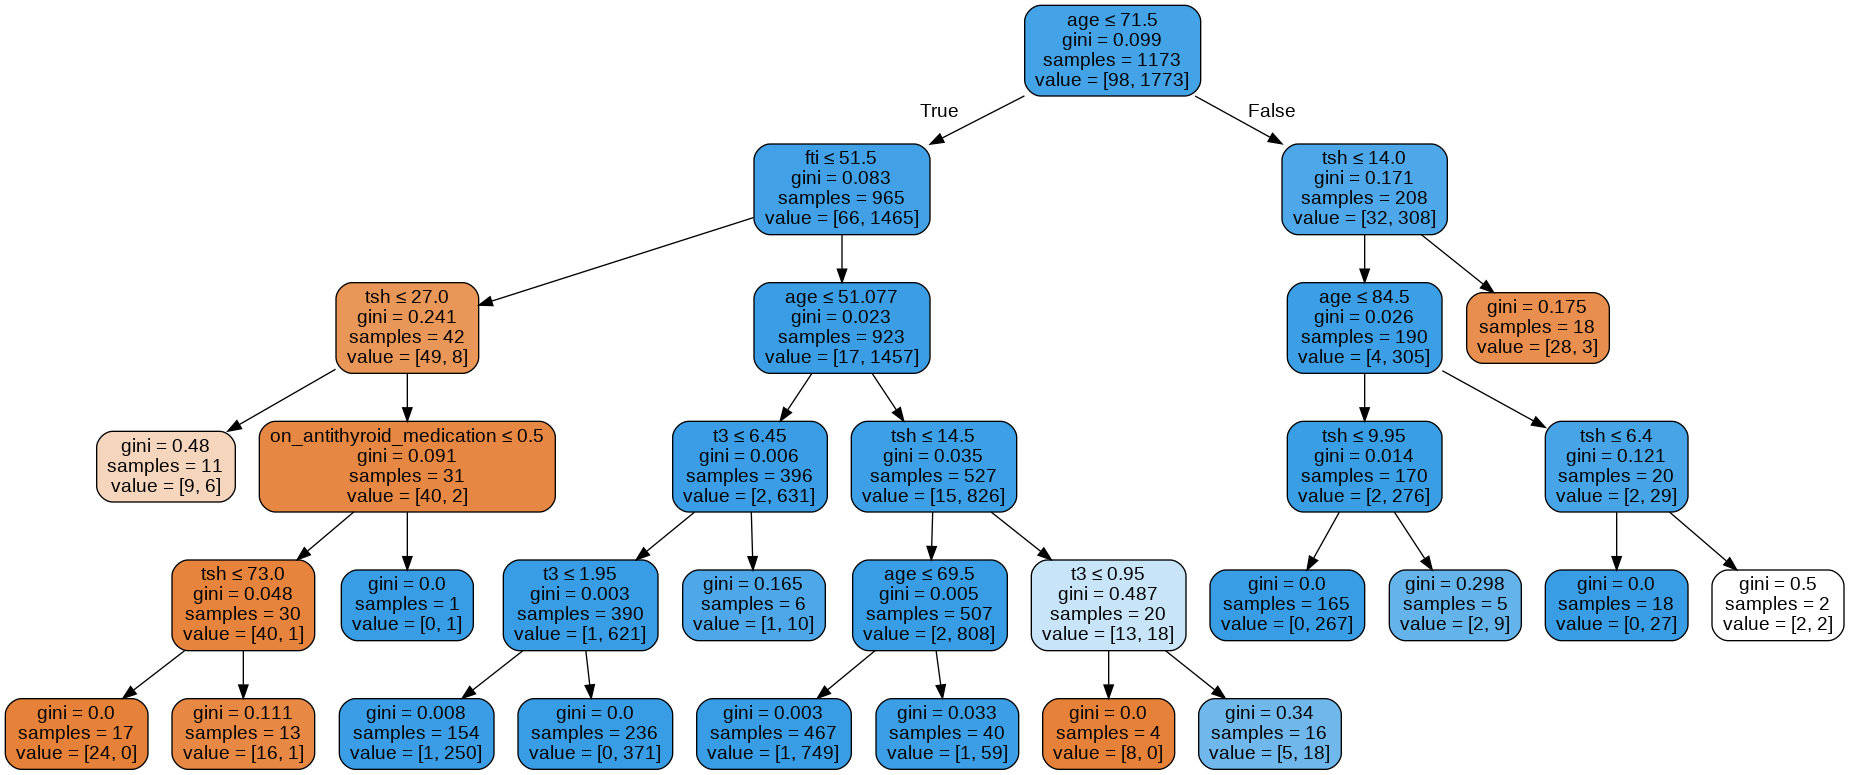

In [213]:
feature_names = X.columns
test_features = feature_names

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('termdeposit_forest.png')
Image(graph.create_png())

In [214]:
# get numerical feature importances 
importances = list(forest.estimators_[10].feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# sort the values in ascending order

feature_importances = sorted(feature_importances, key=(lambda x: x[1]))

[print('variable: {:20}  importance: {}'.format(*pair)) for pair in feature_importances]



[('tsh', 0.15), ('fti', 0.8), ('on_antithyroid_medication', 0.0), ('on_antithyroid_medication', 0.0), ('t3', 0.01), ('age', 0.04)]

variable: on_antithyroid_medication  importance: 0.0
variable: on_antithyroid_medication  importance: 0.0
variable: t3                    importance: 0.01
variable: age                   importance: 0.04
variable: tsh                   importance: 0.15
variable: fti                   importance: 0.8


[None, None, None, None, None, None]

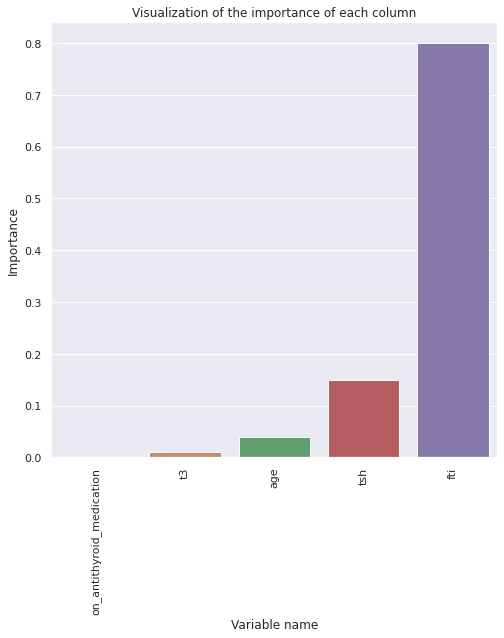

In [215]:

#Visualizing the important features

#Creating the dataframe with the important features
x_val = pd.DataFrame(feature_importances)
x_val
#Plotting the graphs using the seaborn barplot
plt.figure(figsize=(8,8))
sns.barplot(x =0, y = 1, data=x_val)
plt.xlabel('Variable name')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Visualization of the importance of each column')
plt.show()

###Gradient boosted decision trees

In [216]:
# splitting the data into features and labels 
X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setting the number of trees that we want to predict
target_number_trees = 100

# setting the parameters for the classification boosting and fitting the model
gbc = GradientBoostingClassifier(learning_rate=1, n_estimators = target_number_trees, max_depth=5, min_samples_split=20, random_state=0)

gbc = gbc.fit(X_train, y_train)

# predicting the model
y_pred = gbc.predict(X)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---

from sklearn import metrics

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics

print('The mean accuracy score of the model is ', gbc.score(X, y))


The mean accuracy score of the model is  0.9615220179563916



###Support Vector Machine Algorithms

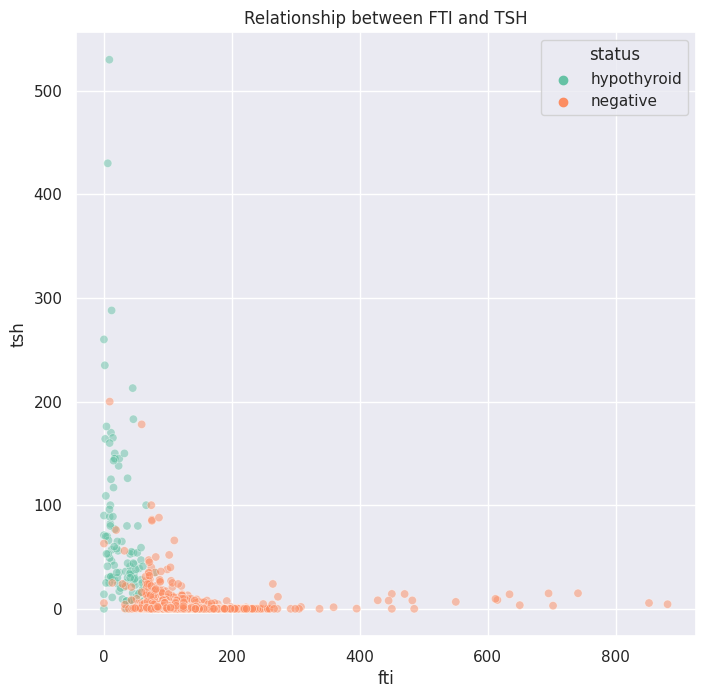

In [217]:
#Visualizing the relation of important features in the data
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x='fti', y='tsh', hue='status', alpha=0.5, data=df, palette='Set2')
plt.title('Relationship between FTI and TSH');

In [218]:
#Fitting the model using a linear function
# split the data into x and y
X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)


# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X = preprocessing.normalize(X)

# splitting the data into training data and testing data. We will train using 80% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
lin_model = model.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))


Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


###Fitting the model using the polynomial function.

In [219]:
# fitting the model on to the data
X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X_svm = preprocessing.normalize(x)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(X_train, y_train)
#making prediction
y_pred = poly.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))


Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


###Fitting the model using the RBF function

In [220]:
# splitting the data into x and y values
X = df[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(df['status']=='hypothyroid',0,1)


# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

x = preprocessing.normalize(X)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# contructing a model using the RBF function

rbf = SVC(kernel='rbf')

# training the model 

rbf.fit(X, y)

y_pred = rbf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.014957264957264958
Mean Squared Error: 0.014957264957264958
Root Mean Squared Error: 0.12229989761755714
The accuracy of the linear model is  0.9850427350427351


##7. Conclusion

In [261]:
# Lets compare the performance of our different models

# initialize list of lists
data = [['Baseline Model',  0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'], ['Random Forest with grid search', 0.019735460334817087, 0.010839192176258087, 0.10411144114004996, 'Nan'], ['Random Forest', 0.017094017094017096, 0.017094017094017096, 0.1307440900921227, '98.2%'],['Gradient boosted decision tree', 'Nan', 'Nan', 'Nan','94.2%'],['Support Vector Machine Algorithm', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'],['With Polynomial function', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'],['With RBF function', 0.014957264957264958, 0.014957264957264958, 0.12229989761755714, '98.5%']]
 
# Create the pandas DataFrame

df = pd.DataFrame(data, columns = ['Model_Name','Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error','Accuracy'])
 
# print dataframe.
print(df )

                         Model_Name  ... Accuracy
0                    Baseline Model  ...    98.1%
1    Random Forest with grid search  ...      Nan
2                     Random Forest  ...    98.2%
3    Gradient boosted decision tree  ...    94.2%
4  Support Vector Machine Algorithm  ...    98.1%
5          With Polynomial function  ...    98.1%
6                 With RBF function  ...    98.5%

[7 rows x 5 columns]


In [262]:
model_compare = pd.DataFrame(df )  #pd. DataFrame(np_array, columns=['Column1', 'Column2']) 
model_compare.set_index('Model_Name')

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
Model_Name,,,,
Baseline Model,0.02,0.02,0.14,98.1%
Random Forest with grid search,0.02,0.01,0.10,Nan
Random Forest,0.02,0.02,0.13,98.2%
Gradient boosted decision tree,Nan,Nan,Nan,94.2%
Support Vector Machine Algorithm,0.02,0.02,0.14,98.1%
With Polynomial function,0.02,0.02,0.14,98.1%
With RBF function,0.01,0.01,0.12,98.5%


As per the table above, the best performing model was the RBF model. scoring an accuracy of 98.5%

I was not able to get the accuracy score of the Random Forest with grid search because the prediction was not binary. however I believe it would have given the best score. 

The least performing model was the Gradient boosted decision tree with an accuracy score of 94.2%

All models passed my metric of success of an accuracy level of above 95%
